In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import time

# Import datasets, classifiers and performance metrics
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from hklearn import LogisticRegression

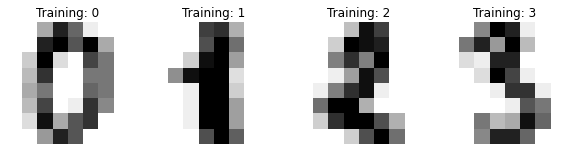

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a logistic classifier
clf = skl.LogisticRegression(C = 0.01, n_jobs = 2)
clf2 = skl.LogisticRegression(C = 0.01)
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=.8, shuffle=False)



# Learn the digits on the train subset
start_time = time.time()
clf.fit(X_train, y_train)
print(time.time() - start_time)
start_time = time.time()
clf2.fit(X_train, y_train)
print(time.time() - start_time)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

2.5190975666046143
0.2870035171508789


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


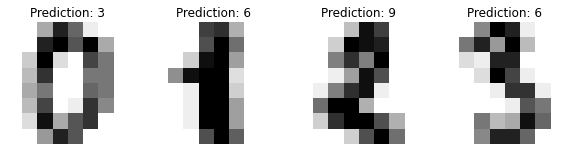

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, digits.images, predicted):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [7]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(C=0.01, n_jobs=2):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       140
           1       0.90      0.67      0.76       144
           2       0.90      0.91      0.90       141
           3       0.96      0.81      0.88       145
           4       0.93      0.94      0.94       147
           5       0.87      0.90      0.89       146
           6       0.92      0.97      0.95       145
           7       0.96      0.88      0.92       144
           8       0.80      0.80      0.80       140
           9       0.66      0.90      0.76       146

    accuracy                           0.88      1438
   macro avg       0.89      0.88      0.88      1438
weighted avg       0.89      0.88      0.88      1438




Confusion matrix:
[[139   0   0   0   1   0   0   0   0   0]
 [  0  96   7   1   1   5   9   0  16   9]
 [  1   0 128   4   0   0   0   0   0   8]
 [  1   0   4 117   0   3   0   1   5  14]
 [  1   0   0   0 138   0   0   4   0   4]
 [  1   0   0   0   3 132   1   0   0   9]
 [  2   1   0   0   0   0 141   0   1   0]
 [  0   0   0   0   0   5   0 126   3  10]
 [  0   6   3   0   0   4   2   0 112  13]
 [  1   4   0   0   5   2   0   0   3 131]]


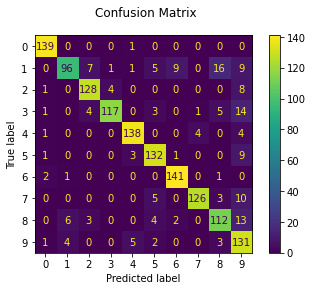

In [8]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [19]:
#Parallel regression threads = 2, threadpool
model_p = LogisticRegression(C = 0.01, maxiter = 400, n_jobs = 10)
start_time = time.time()
model_p.fit(X_train, y_train)
print(time.time() - start_time)

Iter: Iter:  0 1
Iter: 
 2
Iter:  Iter: 3
 Iter:  4
5
Iter:  6
Iter: Iter:  8 7



C:\Users\luis_\Documents\MCIC\PrimerSemestre\PA\Proyecto\hklearn.py:80: RuntimeWarning: divide by zero encountered in log
  - np.matmul((1-y).transpose(),np.log(1-self.sigmoid(np.matmul(X,theta, dtype=np.float64))), dtype=np.float64))
C:\Users\luis_\Documents\MCIC\PrimerSemestre\PA\Proyecto\hklearn.py:80: RuntimeWarning: invalid value encountered in matmul
  - np.matmul((1-y).transpose(),np.log(1-self.sigmoid(np.matmul(X,theta, dtype=np.float64))), dtype=np.float64))


Iter:  9
Optimization terminated successfully.
         Current function value: 0.027750
         Iterations: 170
         Function evaluations: 321
         Gradient evaluations: 321
Optimization terminated successfully.
         Current function value: 0.035319
         Iterations: 181
         Function evaluations: 361
         Gradient evaluations: 361
Optimization terminated successfully.
         Current function value: 0.034711
         Iterations: 243
         Function evaluations: 488
         Gradient evaluations: 488
Optimization terminated successfully.
         Current function value: 0.044508
         Iterations: 249
         Function evaluations: 491
         Gradient evaluations: 491
Optimization terminated successfully.
         Current function value: 0.025527
         Iterations: 357
         Function evaluations: 686
         Gradient evaluations: 686
Optimization terminated successfully.
         Current function value: 0.042352
         Iterations: 283
         Fu

In [20]:
#Run training serially (n_jobs = None)
model_s = LogisticRegression(C = 0.01, maxiter = 400)
start_time = time.time()
model_s.fit(X_train, y_train)
print(time.time() - start_time)

Optimization terminated successfully.
         Current function value: 0.025527
         Iterations: 357
         Function evaluations: 686
         Gradient evaluations: 686
         Current function value: 0.057125
         Iterations: 400
         Function evaluations: 774
         Gradient evaluations: 774
Optimization terminated successfully.
         Current function value: 0.042352
         Iterations: 283
         Function evaluations: 547
         Gradient evaluations: 547
Optimization terminated successfully.
         Current function value: 0.033452
         Iterations: 317
         Function evaluations: 605
         Gradient evaluations: 605
Optimization terminated successfully.
         Current function value: 0.035319
         Iterations: 181
         Function evaluations: 361
         Gradient evaluations: 361
Optimization terminated successfully.
         Current function value: 0.044508
         Iterations: 249
         Function evaluations: 491
         Gradient evalu

C:\Users\luis_\Documents\MCIC\PrimerSemestre\PA\Proyecto\hklearn.py:80: RuntimeWarning: divide by zero encountered in log
  - np.matmul((1-y).transpose(),np.log(1-self.sigmoid(np.matmul(X,theta, dtype=np.float64))), dtype=np.float64))
C:\Users\luis_\Documents\MCIC\PrimerSemestre\PA\Proyecto\hklearn.py:80: RuntimeWarning: invalid value encountered in matmul
  - np.matmul((1-y).transpose(),np.log(1-self.sigmoid(np.matmul(X,theta, dtype=np.float64))), dtype=np.float64))


Optimization terminated successfully.
         Current function value: 0.027750
         Iterations: 170
         Function evaluations: 321
         Gradient evaluations: 321
Optimization terminated successfully.
         Current function value: 0.034711
         Iterations: 243
         Function evaluations: 488
         Gradient evaluations: 488
         Current function value: 0.073861
         Iterations: 400
         Function evaluations: 803
         Gradient evaluations: 800
Optimization terminated successfully.
         Current function value: 0.055374
         Iterations: 383
         Function evaluations: 751
         Gradient evaluations: 751
4.668008089065552


In [21]:
y_pred_s = model_s.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred_s))

y_pred_p = model_p.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred_p))
#print(y_train)
#print(y_pred)
#disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

#plt.show()

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0 34]]
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


In [22]:
print(f"Classification report for serial home made classifier :\n"
      f"{metrics.classification_report(y_train, y_pred_s)}\n")

Classification report for serial home made classifier :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        34
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35
           8       1.00      1.00      1.00        34
           9       0.97      1.00      0.99        34

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359




In [23]:
print(f"Classification report for parallel home made classifier :\n"
      f"{metrics.classification_report(y_train, y_pred_p)}\n")

Classification report for parallel home made classifier :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        34
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35
           8       1.00      1.00      1.00        34
           9       0.97      1.00      0.99        34

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359


